# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Maya Angelina]
- **Email:** [mayaangelinaa02@gmail.com]
- **ID Dicoding:** [maya_angelina_foYn]

## Menentukan Pertanyaan Bisnis

- Which particular hour of the day sees the biggest utilization of bike rentals?
- What impact does the weather situation have on bike rentals?

## Import Semua Packages/Library yang Digunakan

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [119]:
day_df = pd.read_csv("https://raw.githubusercontent.com/xyounggoth/ProyekAnalisisData/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [120]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/xyounggoth/ProyekAnalisisData/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:** The following fields are included in both hour.csv and day.csv, with the exception of hr, which is not in day.csv
- instant : record index
- dteday : date
- season : season (1:spinger, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
-  weathersit :
<ul>1: Clear, Few clouds, Partly cloudy, Partly cloudy </ul>
<ul>2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</ul>
<ul>3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</ul>
<ul>4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</ul>
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered



### Assessing Data

**Assessing day_df table**


In [121]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


checking for missing value in day_df

In [122]:
day_df.isna().sum

<bound method DataFrame.sum of      instant  dteday  season     yr   mnth  holiday  weekday  workingday  \
0      False   False   False  False  False    False    False       False   
1      False   False   False  False  False    False    False       False   
2      False   False   False  False  False    False    False       False   
3      False   False   False  False  False    False    False       False   
4      False   False   False  False  False    False    False       False   
..       ...     ...     ...    ...    ...      ...      ...         ...   
726    False   False   False  False  False    False    False       False   
727    False   False   False  False  False    False    False       False   
728    False   False   False  False  False    False    False       False   
729    False   False   False  False  False    False    False       False   
730    False   False   False  False  False    False    False       False   

     weathersit   temp  atemp    hum  windspeed  casual  registered    cnt  
0         False  False  False  False      False   False       False  False  
1         False  False  False  False      False   False       False  False  
2         False  False  False  False      False   False       False  False  
3         False  False  False  False      False   False       False  False  
4         False  False  False  False      False   False       False  False  
..          ...    ...    ...    ...        ...     ...         ...    ...  
726       False  False  False  False      False   False       False  False  
727       False  False  False  False      False   False       False  False  
728       False  False  False  False      False   False       False  False  
729       False  False  False  False      False   False       False  False  
730       False  False  False  False      False   False       False  False  

[731 rows x 16 columns]>

checking duplicated data in day_df

In [123]:
print("Duplicated data :", day_df.duplicated().sum())

Duplicated data : 0


In [124]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Assessing hour_df table**

In [125]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


checking for missing value in hour_df

In [126]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


checking duplicated data in hour_df

In [127]:
print("Duplicated data :", day_df.duplicated().sum())

Duplicated data : 0


In [128]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- There is no missing value in both day_csv and hour_csv
- There is no duplicated data in both day_csv and hour_csv
- In both day_csv and hour_csv there is dteday with wrong data type, it supposed to be datetime

### Cleaning Data

changing the data type of dteday from object to datetime

In [129]:
datetime_coloumns = ["dteday"]

for coloumn in datetime_coloumns:
  day_df[coloumn] = pd.to_datetime(day_df[coloumn])
  hour_df[coloumn] = pd.to_datetime(hour_df[coloumn])

In [130]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [131]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Data is already clean, there is no missing value, duplicated item
- All the data type is already correct

## Exploratory Data Analysis (EDA)

### Explore ...

Showing the summary of statistic parameter of day_df

In [132]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


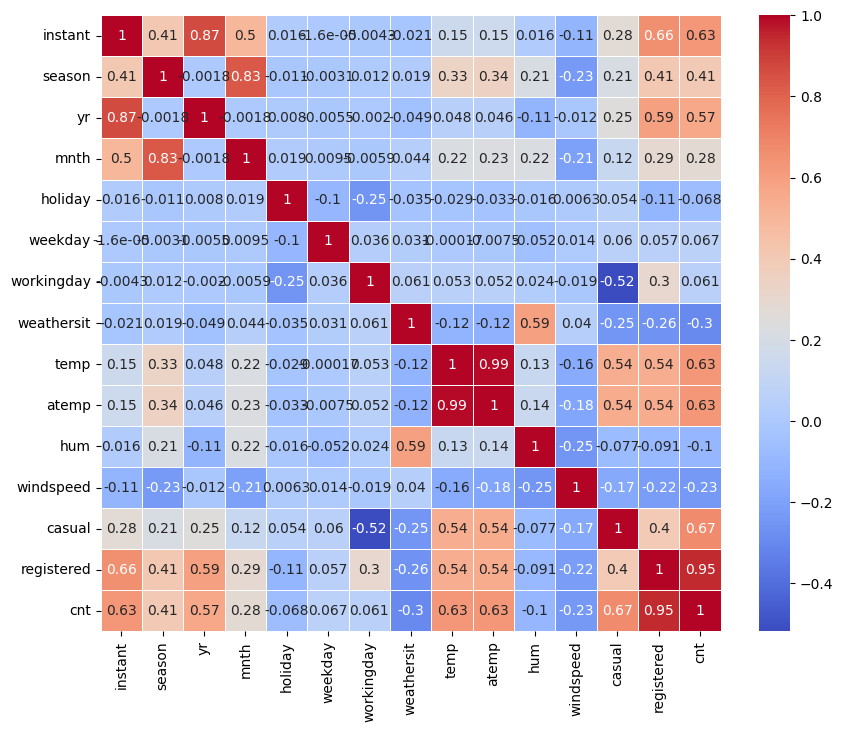

In [133]:
corr_matrix = day_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))

sn.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

In [134]:
day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

,cnt
weathersit,
1,451
2,243
3,21


In [135]:
weather_mapping = {
    1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
    2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
    4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}

day_df['weathersit'] = day_df['weathersit'].map(weather_mapping)

day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)


,cnt
weathersit,
"Clear, Few clouds, Partly cloudy, Partly cloudy",451
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",243
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",21


In [136]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [137]:
hour_df.groupby(by="hr").cnt.nunique().sort_values(ascending=False)

,cnt
hr,
17,494
18,471
8,467
19,423
16,414
14,385
12,383
15,383
13,377


**Insight:**
- In the weathersit, value 4 or "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog dos" have value 0, so it doesn't not appear in the counter

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [138]:
hour_grouped = hour_df.groupby(by="hr").cnt.nunique()

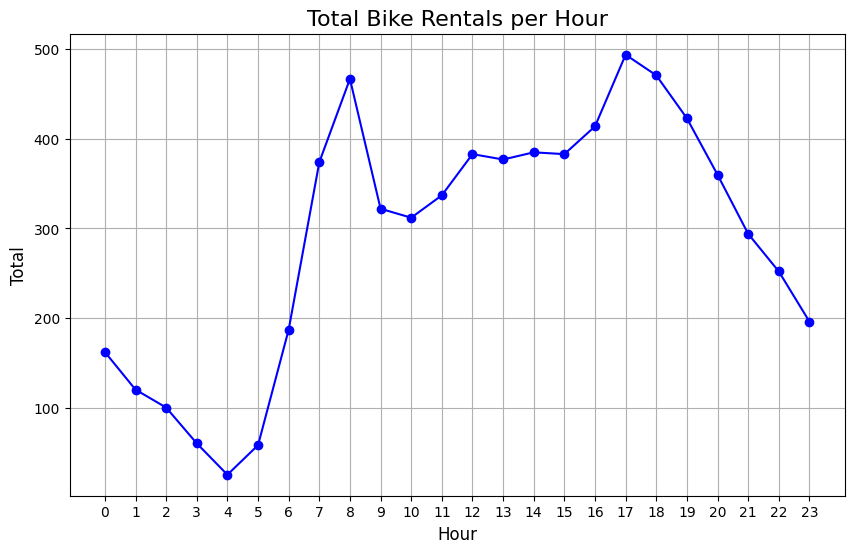

In [139]:
plt.figure(figsize=(10,6))
plt.plot(hour_grouped.index, hour_grouped.values, marker='o', linestyle='-', color='b')

plt.title('Total Bike Rentals per Hour', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.xticks(range(24))

plt.grid(True)
plt.show()

### Pertanyaan 2:

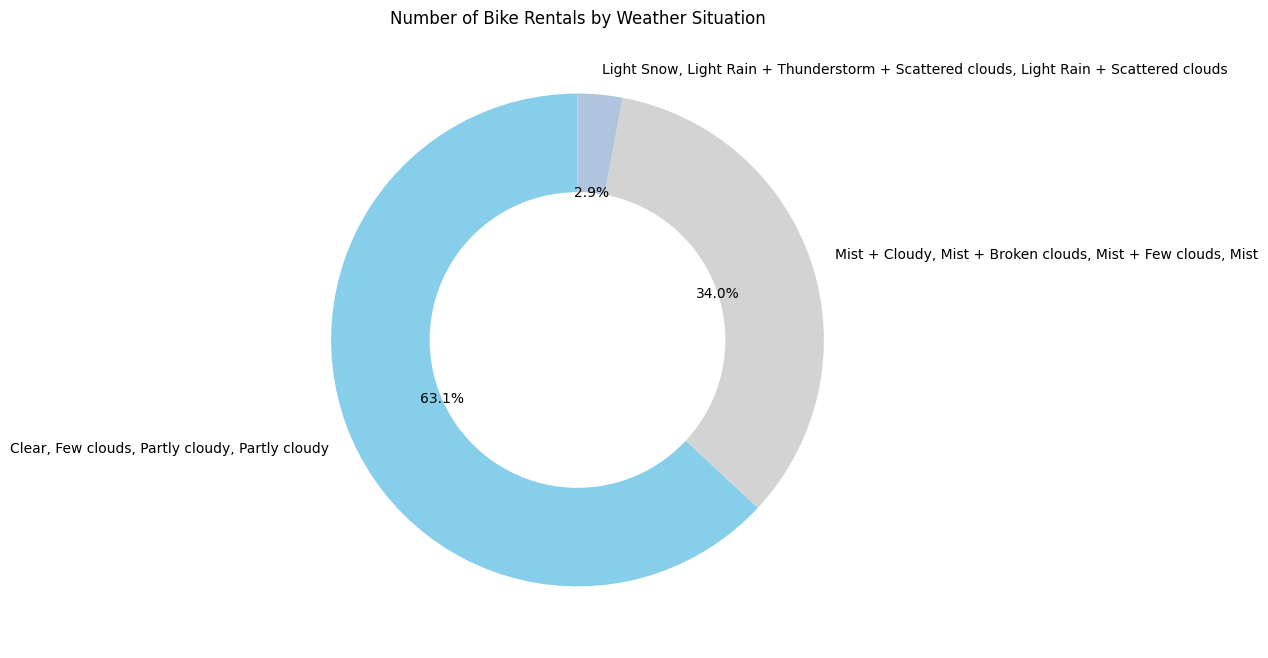

In [140]:
weather_counts = day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

plt.figure(figsize=(8,8))
weather_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgray', 'lightsteelblue', 'slategray'], wedgeprops=dict(width=0.4))
plt.title('Number of Bike Rentals by Weather Situation')
plt.ylabel('')
plt.show()

**Insight:**
###Question 1: Which particular hour of the day sees the biggest utilization of bike rentals?

- Peak Time

The first significant peak happens at eight in the morning, probably in time for the morning commute.
Around 6:00 PM, during the evening rush, there is another peak.

- Periods of Low Activity:

The lowest activity is between 4 and 6 AM, which makes sense given that it's early in the morning and most people aren't riding bikes.
Bicycle rentals sharply decrease after 8 PM, suggesting a decrease in demand during the evening.

- Midday Uniformity:

Bicycle rentals remain consistent between 12 and 3 PM, indicating a moderate amount of use during lunch or other midday activities.

- General Trend:

With lower counts in the early morning, a surge throughout commute hours, and another fall as the day draws to a close, the rents exhibit a U-shaped pattern.

###Question 2: What impact does the weather situation have on bike rentals?
- Weather That Is Mostly Clear or Partly Cloudy:

Favorable weather, such as "Clear, Few clouds, Partly cloudy, Partly cloudy," was experienced for 63.1% of bike rentals. This indicates that most bike riders would rather rent when the weather is nice.

- Weather conditions with mist and clouds:

Thirty-four percent of rentals took place in "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist." This suggests that, despite being less favorable, overcast or misty weather does not greatly discourage people from renting bikes.

- Unfavorable Weather:

Bicycle rentals happened in just 2.9% of cases when the weather was like "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds." It is evident that bad weather significantly lowers the amount of bike rentals.

- In Case of Severe Weather, No Rentals:

Notably, no rentals were available during periods of intense rain, ice pallets, thunderstorms, mist, snow, and fog. Since this weather category has a value of 0, the figure does not show it. Bicycle rentals are particularly vulnerable to inclement weather, as evidenced by the lack of rentals during these extreme conditions, which riders absolutely shun.



## Conclusion

The time of day and the weather have a big impact on bike rentals. Early morning and late evening are the least active times, whereas commuting hours (8 AM and 6 PM) see the most utilization. Good weather, such as partly overcast or bright skies, is necessary for large bike rental numbers. Cloudy or misty weather does, however, nonetheless permit a sizable percentage of rentals. However, bad weather results in a substantial drop in bike rentals, and extremely bad weather results in no activity at all. This suggests that although renting bikes is a common way to get around in nice weather, bad weather greatly discourages people from using them.
